# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. 
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)

    
### Задание

* подобрать оптимальное число кластеров // has done
* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку) //has done
* аналогично исследовать скопления голосов за и против отдельно
* визуализировать результаты голосования в районах
* приложить ноутбук




In [2]:
import pandas as pd 
import numpy as np

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [6]:
df = pd.read_excel("geo_comment.xlsx")

In [7]:
df

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
...,...,...,...,...,...,...
70377,70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...


In [98]:
columns = ['Unnamed: 0','comment_class','multiplier','comment']

In [99]:
X = df.drop(columns, axis = 1)

# Карта Москвы

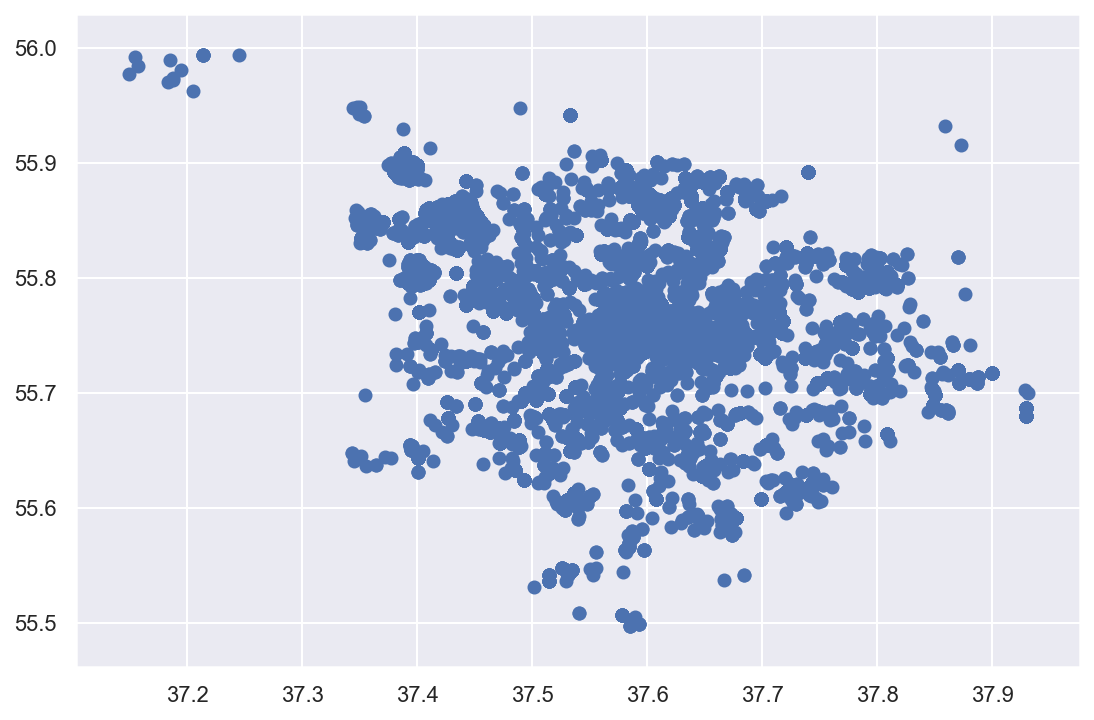

In [100]:
plt.scatter(X.x, X.y)

In [101]:
#нормировка данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Подбор оптимального числа кластеров

In [102]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [103]:
k_inertia = []
ks = range(5,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters = k, n_jobs = -1, random_state = 42)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

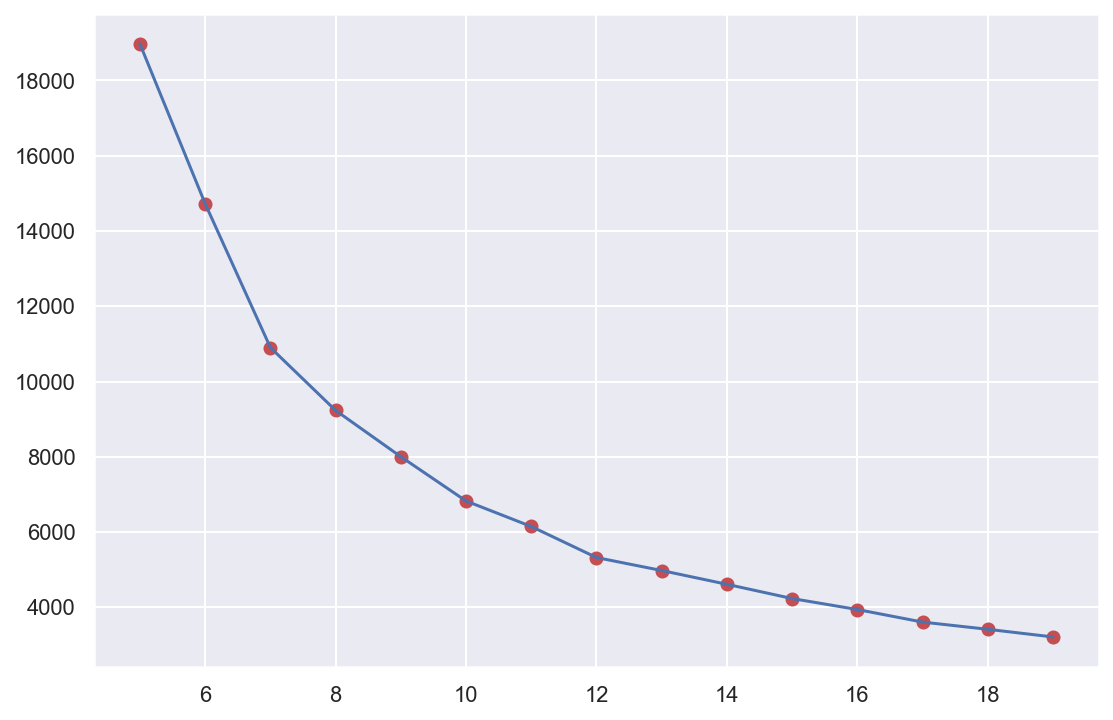

In [104]:
plt.plot(ks, k_inertia, 'ro')
plt.plot(ks, k_inertia);

In [105]:
diff = np.diff(k_inertia)

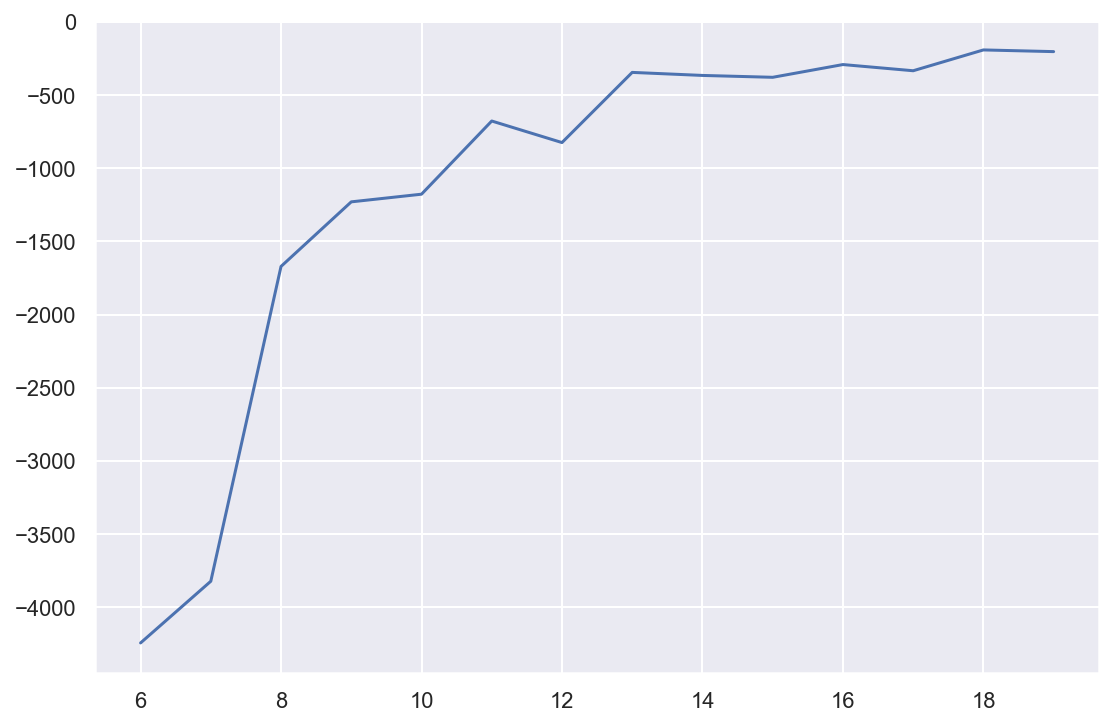

In [106]:
plt.plot(ks[1:], diff);

In [107]:
diff_r = diff[1:] / diff[:-1]

In [108]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

12

# В википедии было подсмотрено, что районов в Москве 12 

In [109]:
clf = KMeans(n_clusters = k_opt,  max_iter = 500, n_jobs = -1, random_state = 42) 
clf.fit(X_scaled)
X['district'] = clf.predict(X_scaled)

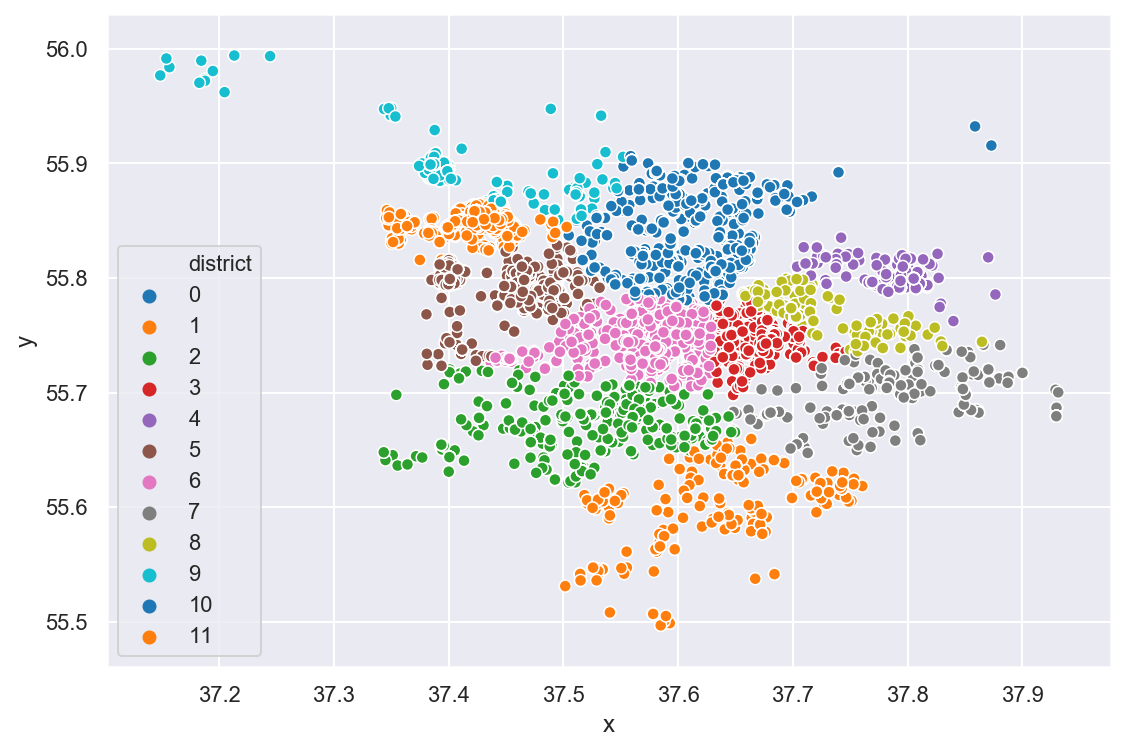

In [110]:
sns.scatterplot(data = X[['x', 'y', 'district']], x = 'x', y = 'y', hue = 'district', palette = 'tab10', legend = 'full')

# Исследование скопления голосов

In [111]:
X['comment_class'] = df.comment_class

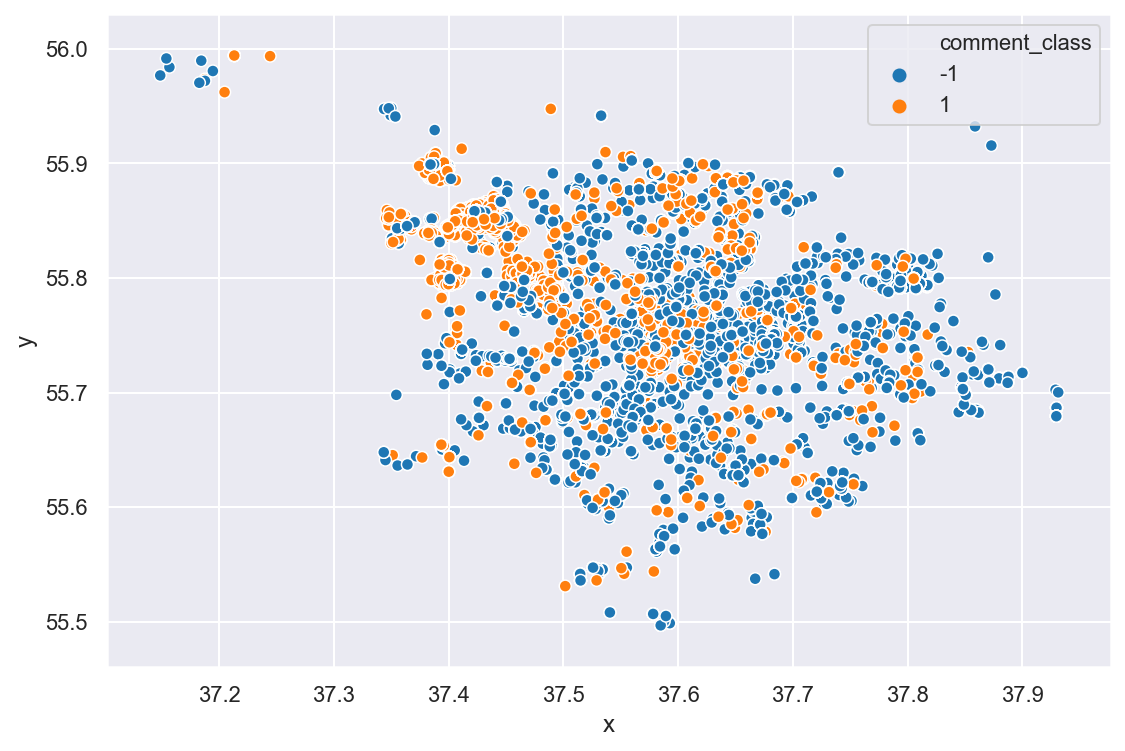

In [112]:
sns.scatterplot(data = X[['x','y','comment_class']],x = 'x', y = 'y', hue = 'comment_class', palette = 'tab10', legend = 'full')

# Результаты голосования в районах

In [113]:
X['multiplier'] = df.multiplier

In [114]:
X['votes'] = np.abs(X.multiplier * X.comment_class)

In [115]:
votes_per_district = X.pivot_table('votes', columns = 'comment_class', index = 'district', aggfunc='sum')

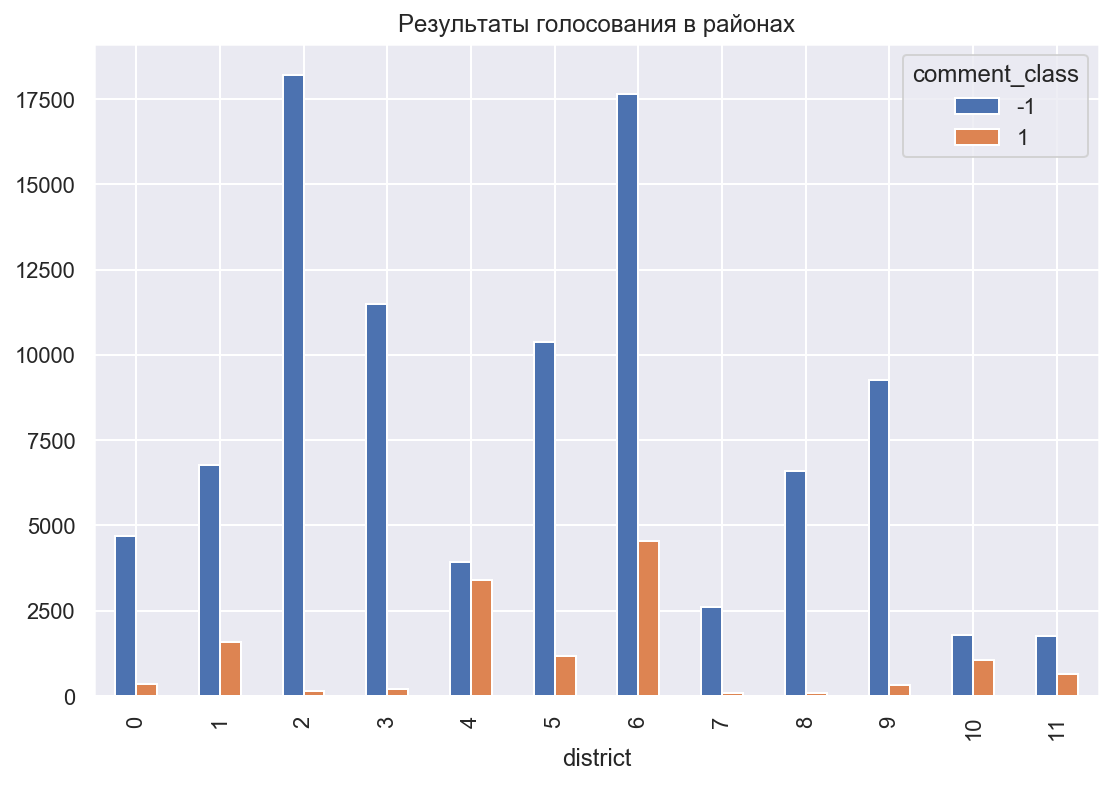

In [116]:
plot = votes_per_district.plot(kind='bar', title = 'Результаты голосования в районах')
plot